<a href="https://colab.research.google.com/github/FelipeAce96/titanic-cli/blob/master/notebooks/TitanicCompetitionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Challenge

[Kaggle Page](https://www.kaggle.com/competitions/titanic/overview)


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).

# GET THE DATA (FROM KAGGLE)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Download Train and Test CSVs
# !pip install kaggle
# !kaggle datasets download -d 'kaggle/competitions/titanic'
# !unzip titanic.zip

In [ ]:
import numpy as np
import pandas as pd
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)
df_train.head()

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# FEATURE ENGINEERING

## Features to Use:

* Pclass: Ticket class (represents the passenger's socioeconomic class).

      1: First class
      2: Second class
      3: Third class

* Sex: Passenger's gender.

* Age: Passenger's age. Missing values may exist.

* SibSp: Number of siblings or spouses aboard.

* Parch: Number of parents or children aboard.

* Fare: Fare of the ticket.


<Axes: >

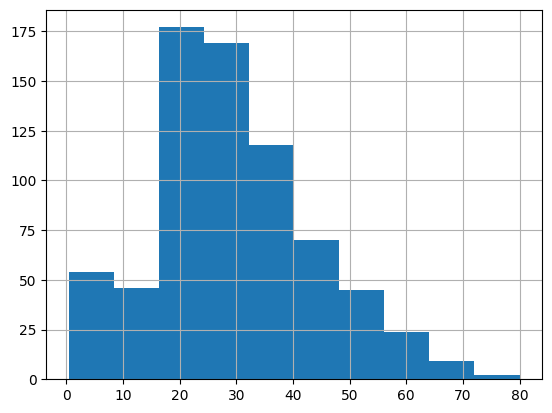

In [ ]:
# AGE FEATURE HAS MISSING VALUES
df_train['Age'].hist()

<Axes: >

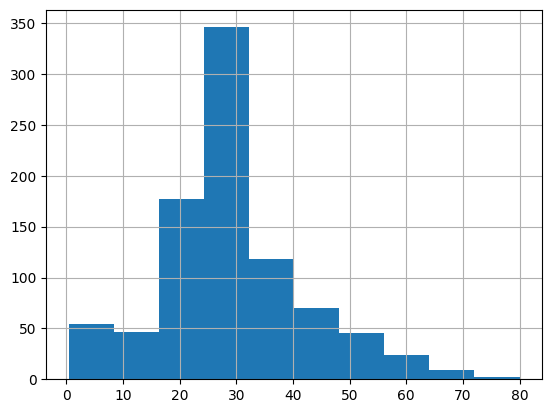

In [ ]:
df_train['Age'].fillna(df_train['Age'].mean()).hist()

In [ ]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: >

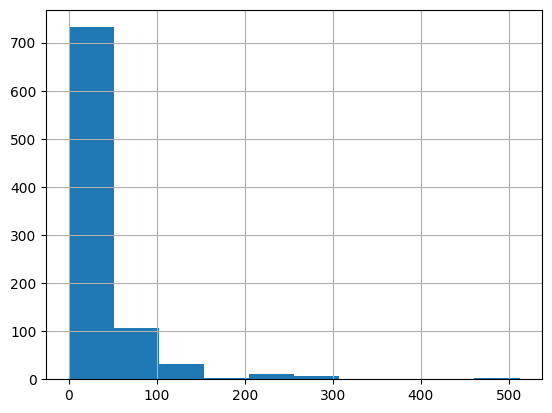

In [ ]:
# Let see the Fare distribution
df_train['Fare'].hist() # -> It looks as a log-normal distribution

<Axes: >

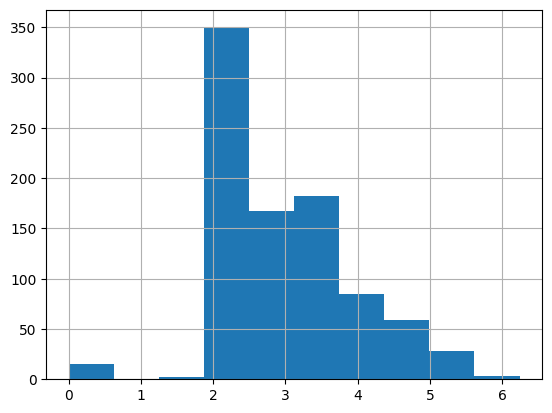

In [ ]:
df_train['Fare'].apply(lambda x: np.log(x+1)).hist()

<Axes: >

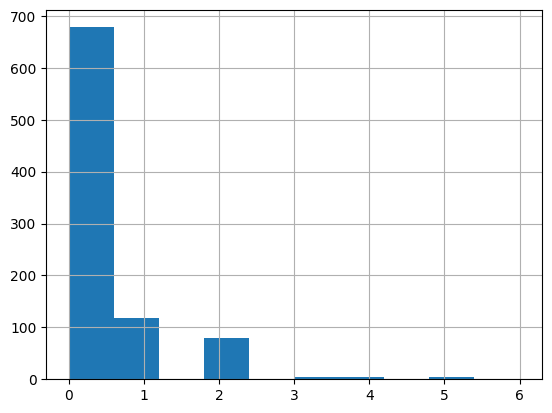

In [ ]:
# Let see the Parch distribution
df_train['Parch'].hist() # -> It looks as a log-normal distribution

<Axes: >

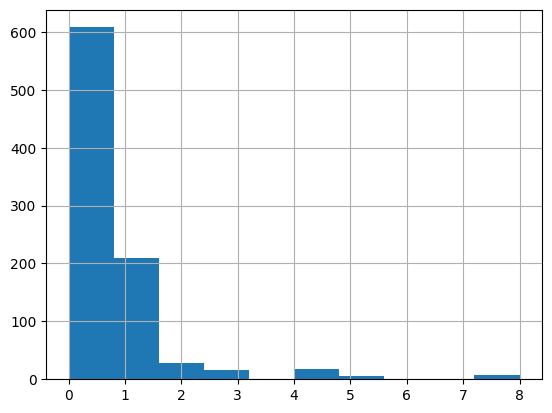

In [ ]:
# Let see the Sibsp distribution
df_train['SibSp'].hist()

In [ ]:
# Get final X Matrix to train and cross validate the results

def get_x_matrix_from_dataframe(dataframe, category_columns = ['Pclass', 'Sex', 'Embarked']):
  """
  USE CATEGORIES FEATURES AS ONE HOT ENCODER AND TRANFORM SOME CONTINIOUS VARIABLES
  """
  #fill nas
  dataframe['Age'] = dataframe['Age'].fillna(dataframe['Age'].mean())
  dataframe['Embarked'] = dataframe['Embarked'].fillna(dataframe['Embarked'].mode())

  temp = pd.get_dummies(dataframe, columns=category_columns)
  temp['log_fare'] = dataframe['Fare'].apply(lambda x: np.log(x+1)).fillna(np.log(1))

  X = temp[['Age','SibSp','Parch','log_fare',
            "Pclass_1",	"Pclass_2",	"Pclass_3",	"Sex_female",	"Sex_male",	"Embarked_C",	"Embarked_Q",	"Embarked_S"
            ]]
  return X

In [ ]:
X = get_x_matrix_from_dataframe(df_train)
X

,Age,SibSp,Parch,log_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1,0,2.110213,0,0,1,0,1,0,0,1
1,38.000000,1,0,4.280593,1,0,0,1,0,1,0,0
2,26.000000,0,0,2.188856,0,0,1,1,0,0,0,1
3,35.000000,1,0,3.990834,1,0,0,1,0,0,0,1
4,35.000000,0,0,2.202765,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,2.639057,0,1,0,0,1,0,0,1
887,19.000000,0,0,3.433987,1,0,0,1,0,0,0,1
888,29.699118,1,2,3.196630,0,0,1,1,0,0,0,1
889,26.000000,0,0,3.433987,1,0,0,0,1,1,0,0


In [ ]:
# X.iloc[100:200]

In [ ]:
X_test = get_x_matrix_from_dataframe(df_test)
X_test

,Age,SibSp,Parch,log_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.50000,0,0,2.178064,0,0,1,0,1,0,1,0
1,47.00000,1,0,2.079442,0,0,1,1,0,0,0,1
2,62.00000,0,0,2.369075,0,1,0,0,1,0,1,0
3,27.00000,0,0,2.268252,0,0,1,0,1,0,0,1
4,22.00000,1,1,2.586824,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,2.202765,0,0,1,0,1,0,0,1
414,39.00000,0,0,4.699571,1,0,0,1,0,1,0,0
415,38.50000,0,0,2.110213,0,0,1,0,1,0,0,1
416,30.27259,0,0,2.202765,0,0,1,0,1,0,0,1


## TAKE A LOOK TO OUR TARGET VARIABLE

In [ ]:
TARGET = 'Survived'

In [ ]:
df_train[TARGET].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<Axes: >

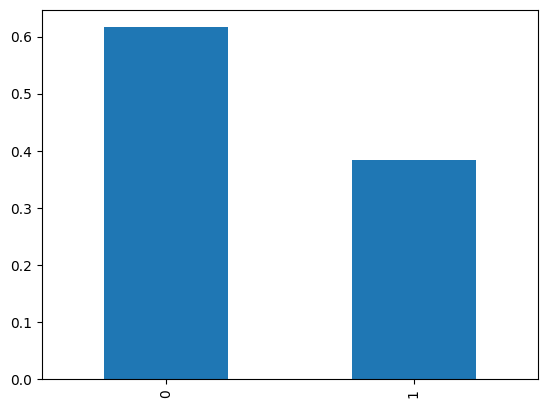

In [ ]:
df_train[TARGET].value_counts(normalize = True).plot(kind='bar') #Clearly there is an unbalanced dataset

In [ ]:
y = df_train['Survived']
y.shape

(891,)

The data is unbalanced, so i will use as metric to compare models th**e F1 Score (Weigthed)** to try to reduce the bias to the "0 class" and get better results knowing the data is unbalanced.

## MODELING AND FEATURE IMPORTANCE

In [ ]:
# Using K folds for better validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


# Inicialatize the RandomForestClassifier
model = LogisticRegression(random_state=42) # Defgault Hyperparameters

# List of all the predictions of each fold
accuracies = []
f1_scores = []

# iterate each fold
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict in validate dataset
    y_pred = model.predict(X_val)

    # General Accuracy ?
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

    # General F1?
    f1 = f1_score(y_val, y_pred, average='weighted')
    f1_scores.append(f1)

# Calculate the accuracy and average f1 score
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {average_accuracy:.5f}')

average_f1 = sum(f1_scores) / len(f1_scores)
print(f'Average F1-Score: {average_f1:.5f}')

Average Accuracy: 0.79573
Average F1-Score: 0.79387


## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Inicialatize the RandomForestClassifier
model = RandomForestClassifier(random_state=42) # Defgault Hyperparameters

# List of all the predictions of each fold
accuracies = []
f1_scores = []

# iterate each fold
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict in validate dataset
    y_pred = model.predict(X_val)

    # General Accuracy ?
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

    # General F1?
    f1 = f1_score(y_val, y_pred, average='weighted')
    f1_scores.append(f1)

# Calculate the accuracy and average f1 score
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {average_accuracy:.5f}')

average_f1 = sum(f1_scores) / len(f1_scores)
print(f'Average F1-Score: {average_f1:.5f}')

Average Accuracy: 0.81369
Average F1-Score: 0.81207


## XGBOOST

In [ ]:
import xgboost as xgb

# Initialize the XGBoost model
model = xgb.XGBClassifier(random_state=42)

# List of all the predictions of each fold
accuracies = []
f1_scores = []

# iterate each fold
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict in validate dataset
    y_pred = model.predict(X_val)

    # General Accuracy ?
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

    # General F1?
    f1 = f1_score(y_val, y_pred, average='weighted')
    f1_scores.append(f1)

# Calculate the accuracy and average f1 score
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {average_accuracy:.5f}')

average_f1 = sum(f1_scores) / len(f1_scores)
print(f'Average F1-Score: {average_f1:.5f}')

Average Accuracy: 0.81596
Average F1-Score: 0.81449


## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the Knn model
model = KNeighborsClassifier()

# List of all the predictions of each fold
accuracies = []
f1_scores = []

# iterate each fold
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict in validate dataset
    y_pred = model.predict(X_val)

    # General Accuracy ?
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)

    # General F1?
    f1 = f1_score(y_val, y_pred, average='weighted')
    f1_scores.append(f1)

# Calculate the accuracy and average f1 score
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average Accuracy: {average_accuracy:.5f}')

average_f1 = sum(f1_scores) / len(f1_scores)
print(f'Average F1-Score: {average_f1:.5f}')

Average Accuracy: 0.79458
Average F1-Score: 0.79035


## FEATURE IMPORTANCE
There is not such big difference between xgboost and random forest. For simplicity i will take the random forest for the continious analysis


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Evaluate the model with best parameters on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
print(f'Accuracy with Best Parameters: {accuracy:.5f}')
print(f'F1 with Best Parameters: {f1:.5f}')
print(best_model)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy with Best Parameters: 0.79888
F1 with Best Parameters: 0.79545
RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=42)


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
## FEATURE IMPORTANCE

# Initialize the RandomForestClassifier
model = RandomForestClassifier(**best_params)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Print or visualize feature importances
pd.DataFrame(zip(X.columns, feature_importances), columns=['FEATURE', 'IMPORTANCE']).sort_values(by='IMPORTANCE', ascending=False)


,FEATURE,IMPORTANCE
7,Sex_female,0.249303
8,Sex_male,0.217922
3,log_fare,0.160379
0,Age,0.118447
6,Pclass_3,0.090670
4,Pclass_1,0.041660
1,SibSp,0.039136
2,Parch,0.027751
5,Pclass_2,0.019103
11,Embarked_S,0.016087


In [ ]:
# IT LOOKS LIKE SEX, FARE AND AGE ARE THE MOST IMPORTANT FEATURES.

In [ ]:
#Take a look to the conditional probablilities in the training dataset

In [ ]:
df_train.loc[df_train['Sex']=='male', 'Survived'].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [ ]:
df_train.loc[df_train['Sex']=='female', 'Survived'].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [ ]:
df_train.loc[df_train['Fare']>100, 'Survived'].value_counts(normalize=True)

1    0.735849
0    0.264151
Name: Survived, dtype: float64

In [ ]:
df_train.loc[df_train['Fare']<100, 'Survived'].value_counts(normalize=True)

0    0.638425
1    0.361575
Name: Survived, dtype: float64

In [ ]:
# Make sense.

P(Survived | Sex = Male) = 19%


P(Survived | Sex = Female) = 73%

## SAVE THE MODELS FOR PRODUCTION USE

In [ ]:
import pickle

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# load the model from the file

with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded_model for predictions

In [ ]:
loaded_model

RandomForestClassifier(max_depth=10, min_samples_leaf=4)

In [ ]:
predictions = loaded_model.predict(X_test)

In [ ]:
#Do the predictions follow the Survived distribution?

pd.Series(predictions).value_counts(normalize=True)  #yes

0    0.65311
1    0.34689
dtype: float64

## CONCLUSIONS

## **Is the Model Good?** 🤔

I can say with certainty that Yes, it is a good model for various reasons:

1. The model has a performance that surpasses randomness completely, reaching an accuracy close to 80% (well above the 50% we would expect with pure randomness).
2. Due to the imbalanced data, the model manages to capture those elements that represent when a person survives. This is reflected in the weighted F1 metric. (80%)
3. When observing the feature importance of the variables, we see variables like sex being among the most important. When analyzing the data observationally, we can see that this make complete sense. We can see that the conditional probability of survive is a so much bigger if the person is female.

    P(Survive | Sex = Male) = 19%

    P(Survive | Sex = Female) = 73%

4. Even the Random Forest not being the most robust model of all and could be outperformed by models like XGBoost or even a deep neural network, its simplicity gives us two very important things: interpretability of the results and low computational complexity, as it doesn't require GPUs, which can save a few $$ in production.

## **A Few Pieces of Advice for Using in Production** 🚀

1. Suppose that for some reason, we continue to obtain data from Titanic accidents (or similar accidents). The model can be retrained with the incoming new data using a task orchestrator like Airflow.
2. After retraining the model, it can be saved in the cloud to be consumed by a service like an app or API. For this purpose, services like AWS S3 or Firebase Storage (Google) can be used.
3. **Creating an App or API**: Depending on the use case, an API can be created that allows the model to be used with new data (e.g., predicting the number of survivors in a new accident and smartly executing a rescue budget). An API can be created using a Python framework (Flask or FastAPI). From this API, we can download our latest trained model from the cloud and use it with incoming data, whether from a relational database like MySQL or real-time databases like MongoDB or Firestore.
4. After testing our API locally and confirming that it works correctly, we can deploy it to the cloud. The best approach would be to create a container with Docker to avoid issues in the future with changing dependencies. This container can then be deployed using technologies like Azure, Google Cloud, AWS, Heroku, or even NextJS if it's relatively simple.
5. Pay attention to the security and usage of our API.